In [2]:
import os
# Define the target directory
target_directory = r"C:\Users\pablosal\Desktop\gbbai-azure-ai-document-intelligence"  # change your directory here

# Check if the directory exists
if os.path.exists(target_directory):
    # Change the current working directory
    os.chdir(target_directory)
    print(f"Directory changed to {os.getcwd()}")
else:
    print(f"Directory {target_directory} does not exist.")

Directory changed to C:\Users\pablosal\Desktop\gbbai-azure-ai-document-intelligence


In [3]:
from src.ocr.transformer import GPT4VisionManager
from src.extractors.ocr_data_extractor import OCRHelper

gpt_vision_client = GPT4VisionManager()
gpt_vision_client.load_environment_variables_from_env_file()
ocr_data_extractor_helper = OCRHelper(container_name="ocrtest")

2024-01-04 17:48:43,586 - micro - MainProcess - INFO     PDFHelper initialized. (pdf_data_extractor.py:__init__:20)
2024-01-04 17:48:43,591 - micro - MainProcess - INFO     Initialized AzureBlobManager with container ocrtest (blob_data_extractor.py:__init__:50)


In [4]:
INPUT_PATH = 'https://testeastusdev001.blob.core.windows.net/ocrtest/'
OUTPUT_PATH = 'C:\\Users\\pablosal\\Desktop\\gbbai-azure-ai-document-intelligence\\notebooks\\dev\\images'

ocr_data_extractor_helper.extract_images_from_pdf(input_path=INPUT_PATH, output_path=OUTPUT_PATH)

2024-01-04 17:48:45,374 - micro - MainProcess - INFO     Input path is a URL: https://testeastusdev001.blob.core.windows.net/ocrtest/ (ocr_data_extractor.py:extract_images_from_pdf:45)
2024-01-04 17:48:46,254 - micro - MainProcess - INFO     instruction-manual-fieldvue-dvc6200-hw2-digital-valve-controller-en-123052.pdf (blob_data_extractor.py:download_files_to_folder:132)
2024-01-04 17:48:47,633 - micro - MainProcess - INFO     Downloaded instruction-manual-fieldvue-dvc6200-hw2-digital-valve-controller-en-123052.pdf to C:\Users\pablosal\AppData\Local\Temp\tmphdzgggy8\instruction-manual-fieldvue-dvc6200-hw2-digital-valve-controller-en-123052.pdf (blob_data_extractor.py:download_files_to_folder:139)
2024-01-04 17:48:47,635 - micro - MainProcess - INFO     instruction-manual-fisher-ewd-ews-ewt-valves-through-nps-12x8-en-124788.pdf (blob_data_extractor.py:download_files_to_folder:132)
2024-01-04 17:48:48,175 - micro - MainProcess - INFO     Downloaded instruction-manual-fisher-ewd-ews-ewt-

2024-01-04 18:01:05,616 - micro - MainProcess - INFO     Preparing instruction for GPT-4 Vision API call. (transformer.py:prepare_instruction:125)
2024-01-04 18:01:05,617 - micro - MainProcess - INFO     Instruction: [{'role': 'system', 'content': [{'type': 'text', 'text': 'You are an AI assistant capable of processing and summarizing complex documents with diagrams and tables.'}]}, {'role': 'user', 'content': [{'type': 'text', 'text': "\nPlease analyze this document and provide the information in the following format:\n\n1. Summary: Provide a concise summary of the document, focusing on the main points and overall context.\n\n2. Content: Include detailed, granular information extracted from the document, particularly from any tables and diagrams. This information should be presented in a structured format, such as a list or table, \nmaking sure all information is included and that the information is accurate and complete. \n\n3. Category: List key categories or keywords, with a focus 

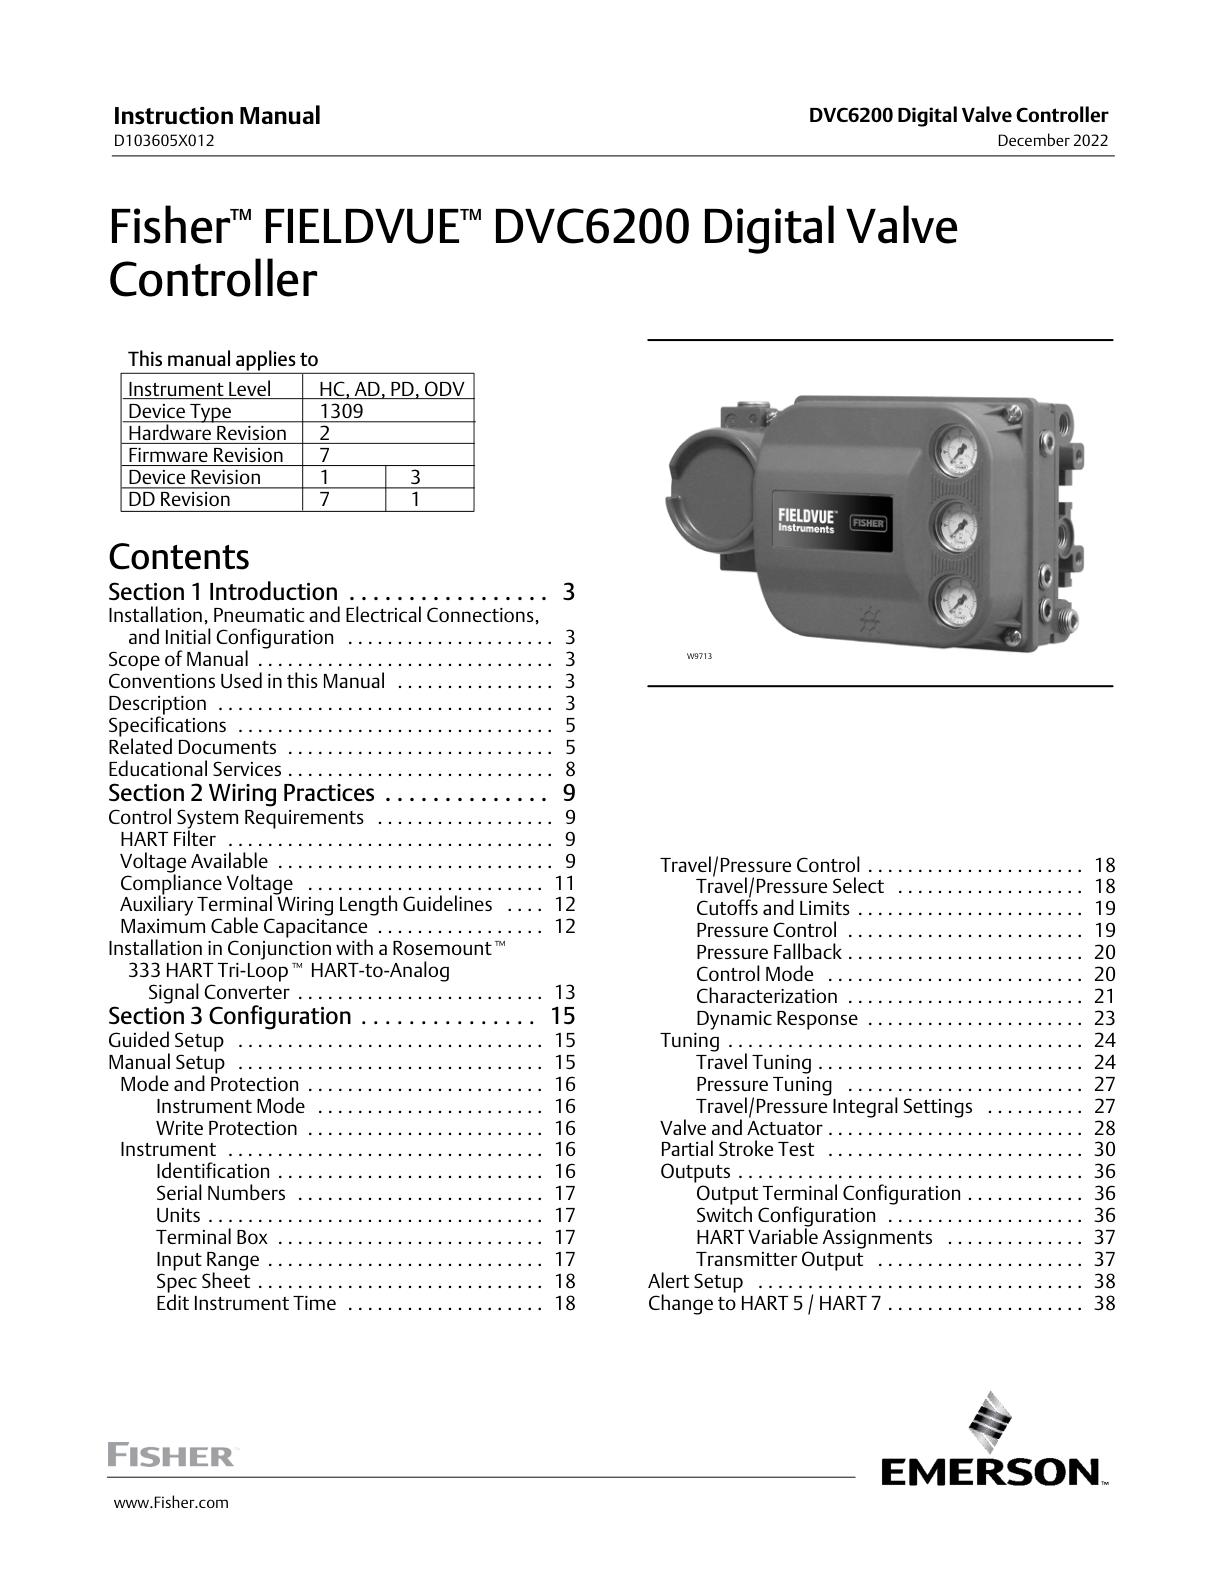

2024-01-04 18:01:45,967 - micro - MainProcess - INFO     Preparing instruction for GPT-4 Vision API call. (transformer.py:prepare_instruction:125)
2024-01-04 18:01:45,967 - micro - MainProcess - INFO     Instruction: [{'role': 'system', 'content': [{'type': 'text', 'text': 'You are an AI assistant capable of processing and summarizing complex documents with diagrams and tables.'}]}, {'role': 'user', 'content': [{'type': 'text', 'text': "\nPlease analyze this document and provide the information in the following format:\n\n1. Summary: Provide a concise summary of the document, focusing on the main points and overall context.\n\n2. Content: Include detailed, granular information extracted from the document, particularly from any tables and diagrams. This information should be presented in a structured format, such as a list or table, \nmaking sure all information is included and that the information is accurate and complete. \n\n3. Category: List key categories or keywords, with a focus 

#summary
The document is an instruction manual for the Fisher™ FIELDVUE™ DVC6200 Digital Valve Controller, with a publication date of December 2022. It covers various aspects of the device, including installation, wiring practices, configuration, and specifications. The manual is relevant for those dealing with instrument levels HC, AD, PD, ODV, device type 1309, and includes information on hardware revision 2, firmware revision 7, device revision 1, and DD revision 7. The contents include sections on introduction, wiring practices, configuration, and additional setup details like tuning and alert setup.

#content
- **Instrument Level:** HC, AD, PD, ODV
- **Device Type:** 1309
- **Hardware Revision:** 2
- **Firmware Revision:** 7
- **Device Revision:** 1
- **DD Revision:** 7
- **Contents:**
  - Section 1 Introduction: Installation, Pneumatic and Electrical Connections, Scope of Manual, Conventions, Description, Specifications, Related Documents, Educational Services.
  - Section 2 Wiri

2024-01-04 18:02:33,352 - micro - MainProcess - INFO     Request successful. (transformer.py:call_gpt4v_image:279)


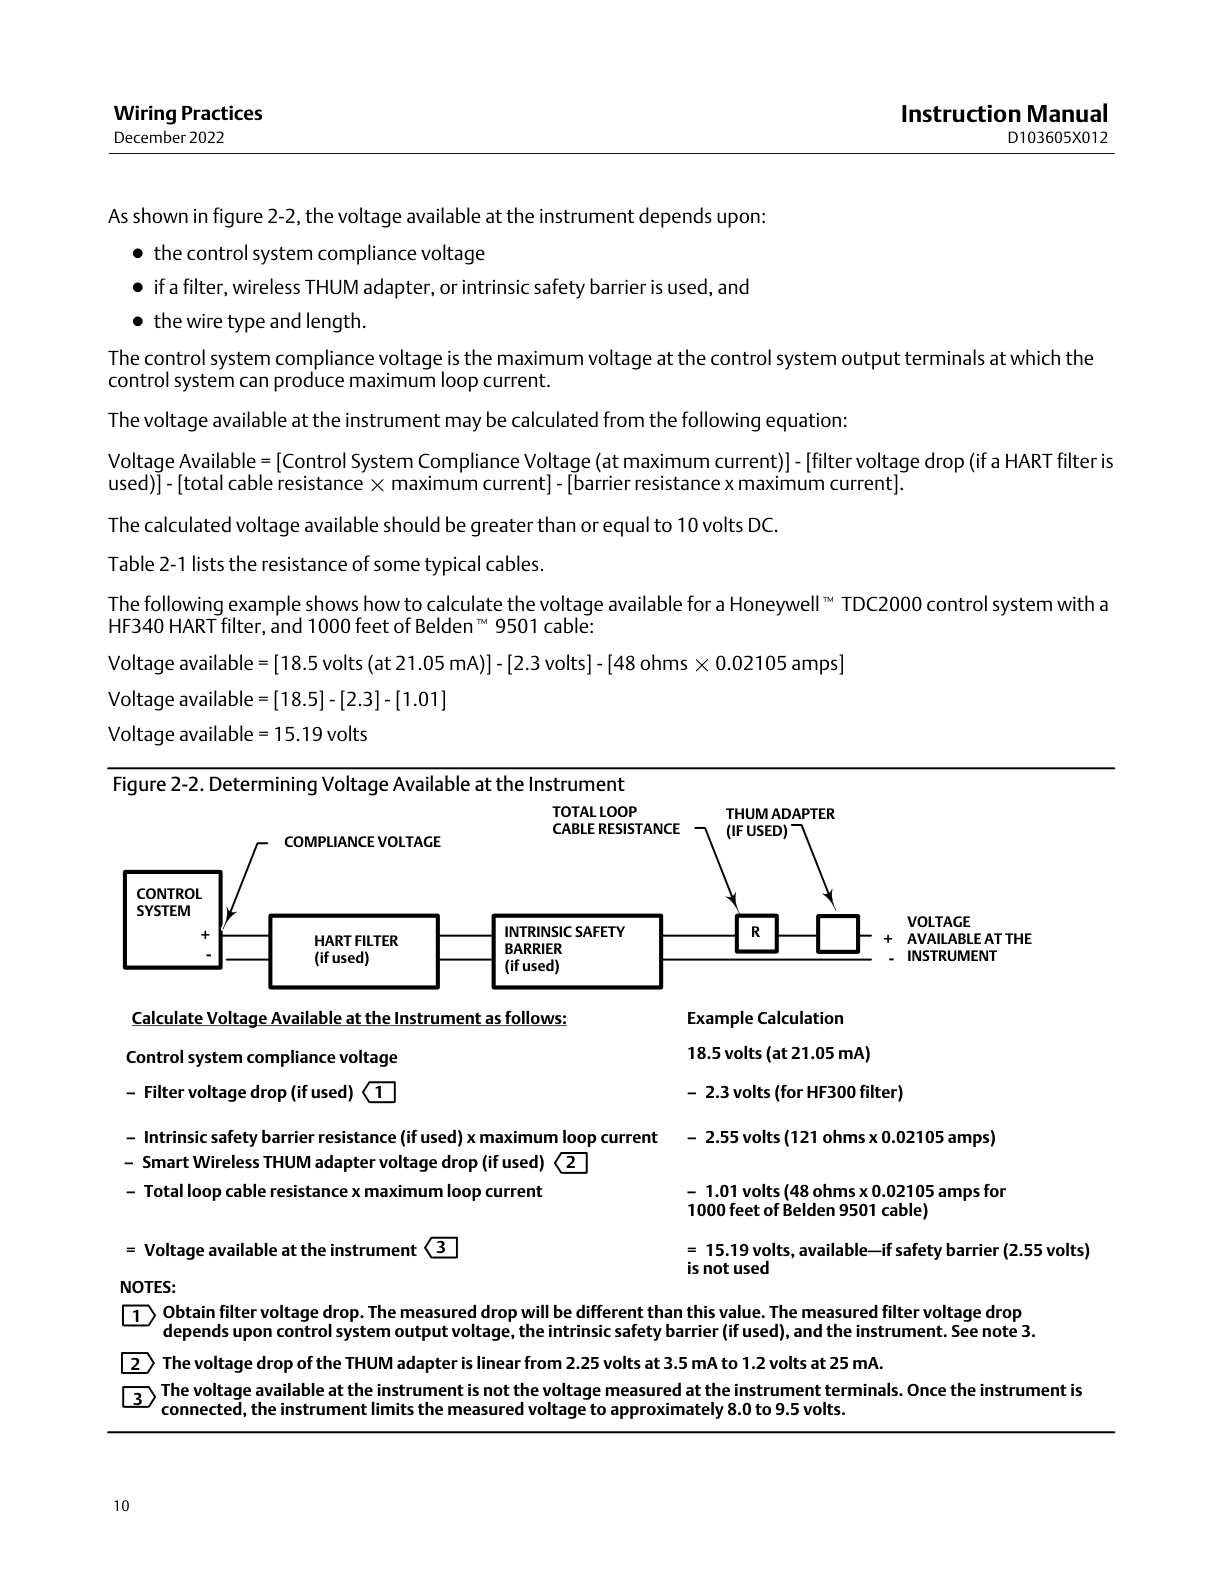

#summary
The document is an instruction manual detailing wiring practices, specifically on calculating the voltage available at an instrument in a control system. It explains that the available voltage depends on the control system compliance voltage, usage of a filter, wireless THUM adapter, or intrinsic safety barrier, and the wire type and length. An equation is provided to calculate the available voltage, which should be greater than or equal to 10 volts DC. An example calculation is given for a Honeywell™ TDC2000 control system, with specific components and cable type. Notes clarify that the actual filter voltage drop may vary, and the measured voltage at the instrument terminals is limited once the instrument is connected.

#content
- Control System Compliance Voltage: Maximum voltage at control system output terminals capable of producing maximum loop current.
- Voltage Calculation Equation: Available Voltage = [Control System Compliance Voltage] - [Filter voltage drop] - [Total

In [7]:
# Define your instructions
sys_message = "You are an AI assistant capable of processing and summarizing complex documents with diagrams and tables."
user_prompt = '''
Please analyze this document and provide the information in the following format:

1. Summary: Provide a concise summary of the document, focusing on the main points and overall context.

2. Content: Include detailed, granular information extracted from the document, particularly from any tables and diagrams. This information should be presented in a structured format, such as a list or table, 
making sure all information is included and that the information is accurate and complete. 

3. Category: List key categories or keywords, with a focus on main products or concepts mentioned in the document. Categories should be abstracted and listed, separated by commas, with a maximum of 10 words.

The purpose is to enable another system to read and understand this information in detail, to facilitate answering precise questions based on the document's context.

Please return the information in the following format:

#summary
<summary text>

#content
<content text>

#category
[<category 1>, <category 2>, <category 3>, ...]
'''

# Specify the directory
input_folder = "C:\\Users\\pablosal\\Desktop\\gbbai-azure-ai-document-intelligence\\notebooks\\dev\\images"

# Get a list of all files in the directory
all_files = os.listdir(input_folder)

# Process each file
for i, filename in enumerate(all_files):
    # Stop after 5 iterations
    if i >= 2:
        break

    # Form the full file path
    image_file_path = os.path.join(input_folder, filename)
    
    # Call the function
    ocr_recognizer = gpt_vision_client.call_gpt4v_image(
        image_file_path,
        system_instruction=sys_message,
        user_instruction=user_prompt,
        ocr=True,
        use_vision_api=True,
        display_image=True,
        max_tokens=2000,
        seed=42
    )
    print(ocr_recognizer)